# Pandas Continued: `split-apply-combine`

Let's take some data apply what you read on `split-apply-combine` in the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

We are going to be working with `data/country_sex_age.csv` (provided in the data folder.)

## Part 1: Getting set up and exploring the data

In [24]:
# import numpy and pandas

import numpy as np 
import pandas as pd 

In [25]:
# read the csv file into a variable called df
# then print out a sample
age_df = pd.read_csv("C:/Users/Simona/Desktop/Data Analysis/concordia-bootcamp/ds-intro-P3-modules-main/ds-intro-P3-modules-main/data/country_sex_age.csv")
df = age_df.copy()

df.sample(5)


,country,seasonality,sex,age_group,month,unemployment,unemployment_rate
1685,at,sa,m,y_lt25,2007.06,29000,8.8
6534,be,trend,m,y_lt25,2003.07,53000,22.1
70639,se,nsa,m,y25-74,2007.08,85000,3.8
12087,cz,trend,m,y25-74,1999.04,132000,5.4
4212,be,sa,f,y25-74,2006.01,144000,7.9


In [26]:
df.sample(2, axis = 1)

,unemployment_rate,age_group
0,4.5,y25-74
1,4.5,y25-74
2,4.5,y25-74
3,4.6,y25-74
4,4.6,y25-74
...,...,...
83155,21.1,y_lt25
83156,20.8,y_lt25
83157,20.5,y_lt25
83158,20.7,y_lt25


In [27]:
# 'country'

df['country']


0        at
1        at
2        at
3        at
4        at
         ..
83155    uk
83156    uk
83157    uk
83158    uk
83159    uk
Name: country, Length: 83160, dtype: object

In [28]:
# 'country' is 'uk'
df.country == 'uk'

0        False
1        False
2        False
3        False
4        False
         ...  
83155     True
83156     True
83157     True
83158     True
83159     True
Name: country, Length: 83160, dtype: bool

In [29]:
# all data for 'country' is 'uk'

df[df.country=='uk']

,country,seasonality,sex,age_group,month,unemployment,unemployment_rate
79152,uk,nsa,f,y25-74,1983.01,543000,6.9
79153,uk,nsa,f,y25-74,1983.02,551000,7.0
79154,uk,nsa,f,y25-74,1983.03,553000,7.0
79155,uk,nsa,f,y25-74,1983.04,558000,7.0
79156,uk,nsa,f,y25-74,1983.05,554000,7.0
...,...,...,...,...,...,...,...
83155,uk,trend,m,y_lt25,2010.06,518000,21.1
83156,uk,trend,m,y_lt25,2010.07,513000,20.8
83157,uk,trend,m,y_lt25,2010.08,509000,20.5
83158,uk,trend,m,y_lt25,2010.09,513000,20.7


In [30]:
df[['country','unemployment_rate']]

,country,unemployment_rate
0,at,4.5
1,at,4.5
2,at,4.5
3,at,4.6
4,at,4.6
...,...,...
83155,uk,21.1
83156,uk,20.8
83157,uk,20.5
83158,uk,20.7


In [ ]:
#df.pop('country')

#takes the country column out of the dataframe. Similar to .drop()

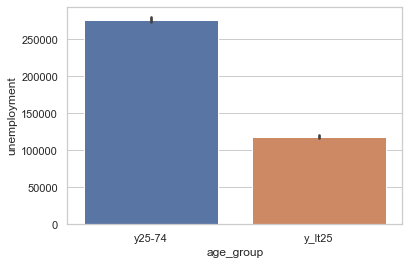

In [31]:
# setup seaborn

import seaborn as sns 

sns.set_theme(style='whitegrid')
ax = sns.barplot(x=df['age_group'],y=df['unemployment'],data=df)


## Part 2: Use `.groupby()`

In [32]:
# take 1: group by 'sex'

df.groupby(['sex'])

In [33]:
# take 2: group by 'sex'

grp = df.groupby(['sex'])
grp

In [45]:
#df['sex'].unique()

df['sex'].value_counts()

f    41580
m    41580
Name: sex, dtype: int64

The `grp` object is an "in-waiting" object that holds the groupby, waiting for you to tell it waht to do with the data.

In [34]:
# take 3: group by 'sex'

df.groupby(['sex']).mean()

,month,unemployment,unemployment_rate
sex,,,
f,1999.398199,188137.566138,12.982629
m,1999.398199,206702.405002,11.671026


In [35]:
# take 4: group by 'sex'
# display unemployment_rate only)

df.groupby('sex')['unemployment_rate'].mean()


sex
f    12.982629
m    11.671026
Name: unemployment_rate, dtype: float64

In [36]:
# take 5: group by 'sex'
# display unemployment_rate only

grp = df.groupby('sex')
grp.unemployment_rate.mean()

sex
f    12.982629
m    11.671026
Name: unemployment_rate, dtype: float64

In [47]:
g = df.groupby('sex')
g.get_group('f').sample(5)

,country,seasonality,sex,age_group,month,unemployment,unemployment_rate
23129,es,trend,f,y_lt25,1993.06,549000,46.7
45196,lt,sa,f,y25-74,2008.05,24000,3.5
68247,ro,nsa,f,y_lt25,2009.07,92000,22.7
68135,ro,nsa,f,y_lt25,2000.03,133000,21.7
44662,lt,nsa,f,y_lt25,2002.02,18000,26.6


In [48]:
g.max()

,country,seasonality,age_group,month,unemployment,unemployment_rate
sex,,,,,,
f,uk,trend,y_lt25,2010.12,1798000,50.2
m,uk,trend,y_lt25,2010.12,2198000,54.4


In [52]:
g.describe()

month                                                              \
       count         mean       std      min      25%       50%      75%   
sex                                                                        
f    41580.0  1999.398199  7.482529  1983.01  1994.09  2000.565  2006.01   
m    41580.0  1999.398199  7.482529  1983.01  1994.09  2000.565  2006.01   

             unemployment                 ...                       \
         max        count           mean  ...       75%        max   
sex                                       ...                        
f    2010.12      41580.0  188137.566138  ...  209000.0  1798000.0   
m    2010.12      41580.0  206702.405002  ...  246000.0  2198000.0   

    unemployment_rate                                                  
                count       mean       std  min  25%  50%   75%   max  
sex                                                                    
f             39906.0  12.982629  9.160382  0.8  6.4  9.9  17.7  50.2  
m             40122.0  11.671026  8.399140  0.8  5.3  8.9  16.7  54.4  

[2 rows x 24 columns]

Note the index of the resulting series is the "groupby key".

If we wanted to group over two different categories, we'd pass a list to the groupby object:

In [37]:
# pass a list to the groupby object

grp = df.groupby(['sex','age_group'])

grp.unemployment_rate.mean()

sex  age_group
f    y25-74        7.566771
     y_lt25       18.457435
m    y25-74        6.244016
     y_lt25       17.098036
Name: unemployment_rate, dtype: float64

This is where the **split-apply-combine** framework comes in. 

1. We **split** into the groups we want (the groupby list)
2. We **apply** the transformation to the statistical column
3. We **combine** (or **aggregate**) the results for each group.

Keep in mind `agg` is an alias for aggregate, so you can just use `agg`.

We can do this for multiple columns with a dictionary:

In [38]:
grp = df.groupby('sex')
grp.agg(np.sum)

,month,unemployment,unemployment_rate
sex,,,
f,83134977.12,7822760000,518084.8
m,83134977.12,8594686000,468264.9


In [39]:

grp = df.groupby(['sex','age_group'])
grp.agg(np.sum)

month  unemployment  unemployment_rate
sex age_group                                              
f   y25-74     41567488.56    5476574000           151797.0
    y_lt25     41567488.56    2346186000           366287.8
m   y25-74     41567488.56    6016451000           125261.2
    y_lt25     41567488.56    2578235000           343003.7

In [40]:
agg_dict = {'unemployment_rate':'mean','unemployment':np.sum} # Strings for inbuilt aggregation methods, You can also use numpy reduce functions

# Aggregate each column in the dict 
# Using the apply function from 

grp = df.groupby(['sex','age_group'])
grp.agg(agg_dict)

unemployment_rate  unemployment
sex age_group                                 
f   y25-74              7.566771    5476574000
    y_lt25             18.457435    2346186000
m   y25-74              6.244016    6016451000
    y_lt25             17.098036    2578235000

Note that this dataframe has two layers of indices -- a `pd.MultiIndex` which is really bothersome to work with.

This is why we often reset the index after doing groupbys, letting us access columns easily:

In [53]:
a = pd.DataFrame(grp)
a

,0,1
0,"(f, y25-74)",country seasonality sex age_group mon...
1,"(f, y_lt25)",country seasonality sex age_group mon...
2,"(m, y25-74)",country seasonality sex age_group mon...
3,"(m, y_lt25)",country seasonality sex age_group mon...


In [56]:
a = grp.agg(agg_dict)
a

unemployment_rate  unemployment
sex age_group                                 
f   y25-74              7.566771    5476574000
    y_lt25             18.457435    2346186000
m   y25-74              6.244016    6016451000
    y_lt25             17.098036    2578235000

In [57]:
a.loc['f','y25-74']

unemployment_rate    7.566771e+00
unemployment         5.476574e+09
Name: (f, y25-74), dtype: float64

In [58]:
a.xs('m', level = 'sex')

,unemployment_rate,unemployment
age_group,,
y25-74,6.244016,6016451000
y_lt25,17.098036,2578235000


In [59]:
arr = [['aaa','bbb','ccc'],[123,456,789]]
arr

[['aaa', 'bbb', 'ccc'], [123, 456, 789]]

In [60]:
pd.MultiIndex.from_arrays(arr, names=('NAME','SCORE'))

MultiIndex([('aaa', 123),
            ('bbb', 456),
            ('ccc', 789)],
           names=['NAME', 'SCORE'])